In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import databaseconfig as conn_string
import os

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
pwd=os.environ.get('PASSWORD')

In [4]:

conn = psycopg2.connect(host='localhost',dbname='Employee',user='postgres',password=pwd)

In [5]:
data=pd.read_sql("select * from employee",conn)

In [6]:
data.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [7]:
data_sal=pd.read_sql("select * from salaries",conn)

In [8]:
data_sal.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [9]:
df1=data_sal['salary']

In [10]:
df1.values

array([60117, 65828, 40006, ..., 49597, 40000, 63707])

In [11]:
bins=[0,20000,40000,60000,80000,100000,120000,140000]

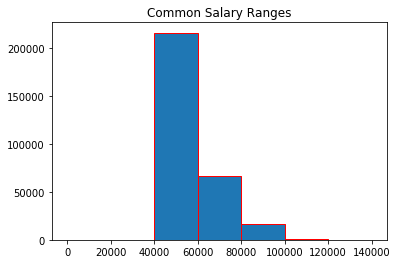

In [12]:
plt.hist(df1.values, bins=bins, edgecolor="r")
plt.xticks(bins)
plt.title("Common Salary Ranges")
plt.show()

In [13]:
data1=pd.read_sql("select t.title,ROUND(AVG(s.salary),2) from salaries s join titles t on s.emp_no=t.emp_no group by t.title",conn)

In [14]:
title=data1.iloc[:,0]

In [15]:
average=data1.iloc[:,1]

<BarContainer object of 7 artists>

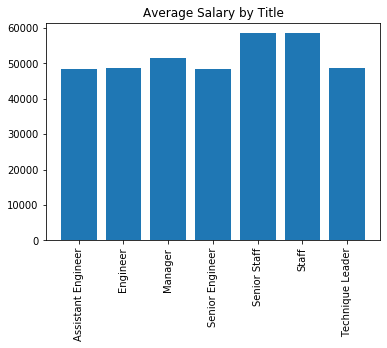

In [16]:
r,c = data1.shape
x=[i for i in range(r)]
fig, ax = plt.subplots()
labels=title
plt.title("Average Salary by Title")
plt.xticks(x,labels, rotation='vertical')
plt.bar(title, average)

In [17]:
data2=pd.read_sql("select * from employee where emp_no=499942",conn)

In [18]:
data2

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,499942,1963-01-10,April,Foolsday,F,1997-02-10


In [19]:
data3=pd.read_sql("select * from salaries where emp_no=499942",conn)

In [20]:
data3

,emp_no,salary,from_date,to_date
0,499942,40000,1998-03-28,1999-03-28


In [21]:
data4=pd.read_sql("select * from dept_employee where emp_no=499942",conn)

In [22]:
data4

,emp_no,dept_id,from_date,to_date
0,499942,d005,1998-03-28,9999-01-01


In [23]:
data5=pd.read_sql("select e.emp_no,e.first_name,e.last_name,e.gender,e.hire_date,s.salary,s.from_date,s.to_date from employee e join salaries s on e.emp_no=s.emp_no and e.emp_no=499942",conn)

In [24]:
data5

,emp_no,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,499942,April,Foolsday,F,1997-02-10,40000,1998-03-28,1999-03-28
